In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# df = pd.read_csv('training.csv')
df = pd.read_csv('/content/gdrive/MyDrive/Kaggle/training.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [5]:
Images = df['Image']

In [6]:
Images = Images.apply(lambda x:np.array(x.split(' ')))

In [7]:
Images

0       [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1       [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
2       [144, 142, 159, 180, 188, 188, 184, 180, 167, ...
3       [193, 192, 193, 194, 194, 194, 193, 192, 168, ...
4       [147, 148, 160, 196, 215, 214, 216, 217, 219, ...
                              ...                        
7044    [71, 74, 85, 105, 116, 128, 139, 150, 170, 187...
7045    [60, 60, 62, 57, 55, 51, 49, 48, 50, 53, 56, 5...
7046    [74, 74, 74, 78, 79, 79, 79, 81, 77, 78, 80, 7...
7047    [254, 254, 254, 254, 254, 238, 193, 145, 121, ...
7048    [53, 62, 67, 76, 86, 91, 97, 105, 105, 106, 10...
Name: Image, Length: 7049, dtype: object

In [8]:
Images =Images.apply(lambda x:x.astype(np.uint8))

In [9]:
type(Images[0][0])

numpy.uint8

In [10]:
Images

0       [238, 236, 237, 238, 240, 240, 239, 241, 241, ...
1       [219, 215, 204, 196, 204, 211, 212, 200, 180, ...
2       [144, 142, 159, 180, 188, 188, 184, 180, 167, ...
3       [193, 192, 193, 194, 194, 194, 193, 192, 168, ...
4       [147, 148, 160, 196, 215, 214, 216, 217, 219, ...
                              ...                        
7044    [71, 74, 85, 105, 116, 128, 139, 150, 170, 187...
7045    [60, 60, 62, 57, 55, 51, 49, 48, 50, 53, 56, 5...
7046    [74, 74, 74, 78, 79, 79, 79, 81, 77, 78, 80, 7...
7047    [254, 254, 254, 254, 254, 238, 193, 145, 121, ...
7048    [53, 62, 67, 76, 86, 91, 97, 105, 105, 106, 10...
Name: Image, Length: 7049, dtype: object

In [11]:
Images = Images/255

In [12]:
def visualize(i):
    img = Images[i].reshape(96,96)
    plt.imshow(img,cmap='gray')
    
    x_nose = df['nose_tip_x'][i]
    y_nose = df['nose_tip_y'][i]
    plt.plot(x_nose,y_nose, 'x',color='w',markersize=15)
    
    x_left_eye = df['left_eye_center_x'][i]
    y_left_eye = df['left_eye_center_y'][i]
    plt.plot(x_left_eye,y_left_eye, 'x',color='w',markersize=15)
    
    x_right_eye = df['right_eye_center_x'][i]
    y_right_eye = df['right_eye_center_y'][i]
    plt.plot(x_right_eye,y_right_eye, 'x',color='w',markersize=15)

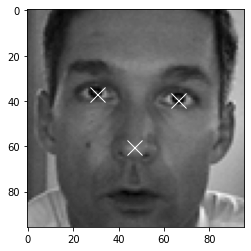

In [13]:
visualize(558)

In [14]:
Labels = df.drop(columns='Image')

In [15]:
Labels

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447


In [18]:
sns.heatmap(Labels.isnull()==True)

NameError: ignored

In [16]:
Labels.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [17]:
#Fill missing values with previous value
Labels_mean = Labels.ffill()

In [18]:
Labels_mean.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
dtype: int64

In [19]:
Images.shape[0]

7049

In [20]:
#shaping images for correct neural_network input (4D array)
neural_images = []
for i in range(Images.shape[0]):
    neural_images.append(Images[i])

In [21]:
neural_images = np.reshape(neural_images,newshape=(Images.shape[0],96,96,1))

In [22]:
Labels.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [23]:
def visualize_neural(i):
    img = neural_images[i,:,:,0]
    plt.imshow(img,cmap='gray')
    
    columns = Labels.columns
    for a in range(0,Labels.shape[1],2):
        plt.plot(Labels[columns[a]][i],Labels[columns[a+1]][i], 'X',color='w',markersize=10)

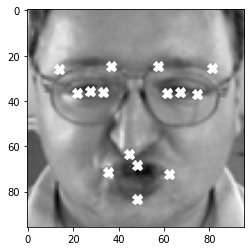

In [24]:
visualize_neural(80)

In [25]:
# INTERFERE WITH DATA HERE

In [26]:
## ADDING NOISE ##

def add_noise_plot(i,factor):
    
    img = neural_images[i,:,:,:]
    img_noise = img.copy()
            
    img_noise = img[:,:,0] + factor*np.random.rand(img.shape[0],img.shape[1]) #najbolje uzeti 0.1
    np.reshape(img_noise,newshape=(96,96,1))
    
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img.reshape(96,96),cmap='gray')
    axarr[1].imshow(img_noise.reshape(96,96),cmap='gray')
    
    
def add_noise(i,factor):
    
    img = neural_images[i,:,:,:]
    img_noise = img.copy()
            
    img_noise = img[:,:,0] + factor*np.random.rand(img.shape[0],img.shape[1]) #najbolje uzeti 0.1
    np.reshape(img_noise,newshape=(96,96,1))
    
    features = Labels_mean.loc[i]
    
    return features,img_noise

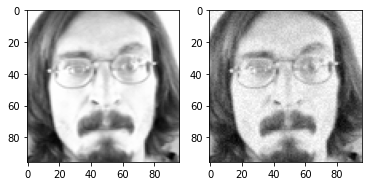

In [27]:
add_noise_plot(25,0.1)

In [28]:
def add_brightness_plot(i,factor):

    img = neural_images[i,:,:,:]
    img_bright = img.copy()
            
    img_bright = img[:,:,0] + np.ones(shape=(img.shape[0],img.shape[1]))*(factor*(np.random.rand(1)[0]-0.5)) #najbolje uzeti 1.5
    img_bright = np.clip(img_bright,0,1)
    np.reshape(img_bright,newshape=(96,96,1))
    
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img.reshape(96,96),cmap='gray')
    axarr[1].imshow(img_bright.reshape(96,96),cmap='gray')
    
def add_brightness(i,factor):

    img = neural_images[i,:,:,:]
    img_bright = img.copy()
            
    img_bright = img[:,:,0] + np.ones(shape=(img.shape[0],img.shape[1]))*(factor*(np.random.rand(1)[0]-0.5)) #najbolje uzeti 1.5
    img_bright = np.clip(img_bright,0,1)
    np.reshape(img_bright,newshape=(96,96,1))
    
    features = Labels_mean.loc[i]
    
    return features,img_bright

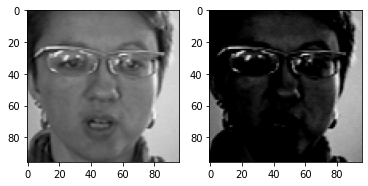

In [29]:
add_brightness_plot(10,1.5)

In [30]:
def add_flip_plot(i):
    img = neural_images[i,:,:,:]
    img_flip = img.copy()
            
    img_flip = np.flip(img,axis=1)
    np.reshape(img_flip,newshape=(96,96,1))
    
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(img.reshape(96,96),cmap='gray')
    axarr[1].imshow(img_flip.reshape(96,96),cmap='gray')
    
# def add_flip_plot(i):
#     img = neural_images[i,:,:,:]
#     img_flip = img.copy()
            
#     img_flip = np.flip(img,axis=1)
#     np.reshape(img_flip,newshape=(96,96,1))
    
#     features = 

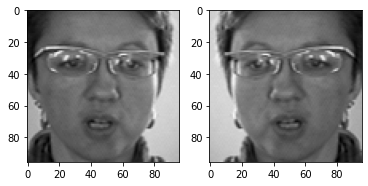

In [31]:
add_flip_plot(10)

In [32]:
### CREATING AN INTERFERED TRAIN SET ###

In [33]:
## CREATING A NOISED FEATURES AND IMAGES

Images_interfered_noise = pd.DataFrame(columns=Labels_mean.columns)
neural_images_interfered_noise = []

for i in range(neural_images.shape[0]):
    a = pd.DataFrame(np.array(add_noise(i,0.1)[0]).reshape(1,-1),columns = add_noise(i,0.1)[0].to_frame().reset_index()['index']) # DATA FRAME WITH INTERFERED FEATURES
    #adding interfered features
    Images_interfered_noise = pd.concat([Images_interfered_noise,a],axis=0)
    #adding an image
    neural_images_interfered_noise.append(add_noise(i,0.1)[1])
    
    
Images_interfered_noise = Images_interfered_noise.reset_index().drop(columns=['index']) # WITHOUT THAT ALL OF THEM HAVE THE SAME INDEX           # FEATURES
neural_images_interfered_noise = np.array(neural_images_interfered_noise).reshape(-1,96,96,1)      #IMAGE

In [34]:
neural_images_interfered_noise.shape

(7049, 96, 96, 1)

In [35]:
def visualize_neural_noised(i):
    img = neural_images_interfered_noise[i,:,:,0]
    plt.imshow(img,cmap='gray')
    
    columns = Labels.columns
    for a in range(0,Labels.shape[1],2):
        plt.plot(Labels[columns[a]][i],Labels[columns[a+1]][i], 'X',color='w',markersize=10)

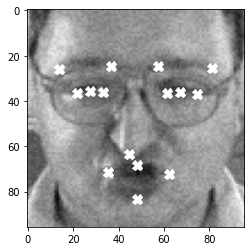

In [36]:
visualize_neural_noised(80)

In [37]:
## CREATING A BRIGHTNESSED FEATURES AND IMAGES

Images_interfered_brightness = pd.DataFrame(columns=Labels_mean.columns)
neural_images_interfered_brightness = []

for i in range(neural_images.shape[0]):
    a = pd.DataFrame(np.array(add_brightness(i,1.5)[0]).reshape(1,-1),columns = add_brightness(i,1.5)[0].to_frame().reset_index()['index']) # DATA FRAME WITH INTERFERED FEATURES
    #adding interfered features
    Images_interfered_brightness = pd.concat([Images_interfered_brightness,a],axis=0)
    #adding an image
    neural_images_interfered_brightness.append(add_brightness(i,1.5)[1])
    
    
Images_interfered_brightness = Images_interfered_brightness.reset_index().drop(columns=['index']) # WITHOUT THAT ALL OF THEM HAVE THE SAME INDEX      #FEATURES
neural_images_interfered_brightness = np.array(neural_images_interfered_brightness).reshape(-1,96,96,1)                                                #IMAGES

In [38]:
neural_images_interfered_brightness.shape

(7049, 96, 96, 1)

In [39]:
def visualize_neural_brightness(i):
    img = neural_images_interfered_brightness[i,:,:,0]
    plt.imshow(img,cmap='gray')
    
    columns = Labels.columns
    for a in range(0,Labels.shape[1],2):
        plt.plot(Labels[columns[a]][i],Labels[columns[a+1]][i], 'X',color='w',markersize=10)

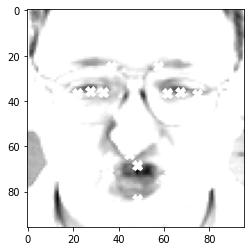

In [40]:
visualize_neural_brightness(80)

In [41]:
neural_images_n_b = np.concatenate((neural_images,neural_images_interfered_noise,neural_images_interfered_brightness)) #original data, noised and brightened
neural_images_n_b.shape

(21147, 96, 96, 1)

In [42]:
Labels_n_b = pd.concat([Labels_mean,Images_interfered_noise,Images_interfered_brightness])
Labels_n_b.shape

(21147, 30)

In [43]:
del Labels
del neural_images
del neural_images_interfered_noise
del neural_images_interfered_brightness
del Images_interfered_noise
del Images_interfered_brightness

In [44]:
import gc

In [45]:
gc.collect()

26076

In [46]:
## TRAIN TEST SPLIT (TRAIN-VALID SPLIT)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(neural_images_n_b, Labels_n_b, test_size=0.4, random_state=25)

In [49]:
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.layers import Conv2D,Dropout,Dense,Flatten,MaxPooling2D, BatchNormalization

In [51]:
# more complicated model

# model = Sequential()

# model.add(Conv2D(filters = 32,kernel_size=(2,2),activation='relu',input_shape=(96,96,1)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 64,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters = 128,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 256,kernel_size=(2,2),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(filters = 512,kernel_size=(2,2),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(512,activation='relu'))

# model.add(Dropout(0.5))

# model.add(Dense(units=30))

## DAJE CUDNE KRIVULJE

# model = Sequential()

# model.add(Conv2D(filters = 4,kernel_size=(3,3),activation='relu',input_shape=(96,96,1)))
# model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))

# model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())

# model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.4))

# model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 256,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters = 512,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(512,activation='relu'))

# model.add(Dropout(0.5))

# model.add(Dense(units=30))

model = Sequential()

model.add(Conv2D(filters = 4,kernel_size=(3,3),activation='relu',input_shape=(96,96,1)))
model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 16,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 256,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 512,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=30))

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 16)        592       
                                                                 
 batch_normalization (BatchN  (None, 92, 92, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 46, 46, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 46, 46, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 16)        2

In [53]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [54]:
import keras

In [55]:
checkpoint_filepath = '/content/gdrive/MyDrive/Kaggle/'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [56]:
results = model.fit(x=X_train,y=y_train,epochs=450,verbose=2,callbacks=[model_checkpoint_callback],validation_data=(X_test, y_test))

Epoch 1/450
397/397 - 33s - loss: 94.8574 - mae: 7.0348 - val_loss: 49.6259 - val_mae: 5.8671 - 33s/epoch - 82ms/step
Epoch 2/450
397/397 - 24s - loss: 38.6402 - mae: 4.6955 - val_loss: 38.3351 - val_mae: 4.7625 - 24s/epoch - 61ms/step
Epoch 3/450
397/397 - 25s - loss: 33.5233 - mae: 4.3219 - val_loss: 37.3956 - val_mae: 4.9250 - 25s/epoch - 64ms/step
Epoch 4/450
397/397 - 24s - loss: 29.5617 - mae: 4.0454 - val_loss: 30.3796 - val_mae: 4.3531 - 24s/epoch - 61ms/step
Epoch 5/450
397/397 - 24s - loss: 28.2855 - mae: 3.9508 - val_loss: 21.8925 - val_mae: 3.6383 - 24s/epoch - 61ms/step
Epoch 6/450
397/397 - 24s - loss: 27.7838 - mae: 3.9002 - val_loss: 119.2690 - val_mae: 9.0490 - 24s/epoch - 61ms/step
Epoch 7/450
397/397 - 24s - loss: 26.1980 - mae: 3.7880 - val_loss: 17.9847 - val_mae: 3.1773 - 24s/epoch - 61ms/step
Epoch 8/450
397/397 - 24s - loss: 26.4370 - mae: 3.8017 - val_loss: 10.4949 - val_mae: 2.0856 - 24s/epoch - 61ms/step
Epoch 9/450
397/397 - 24s - loss: 26.0941 - mae: 3.7723

In [57]:
model.load_weights(checkpoint_filepath)

In [58]:
results.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

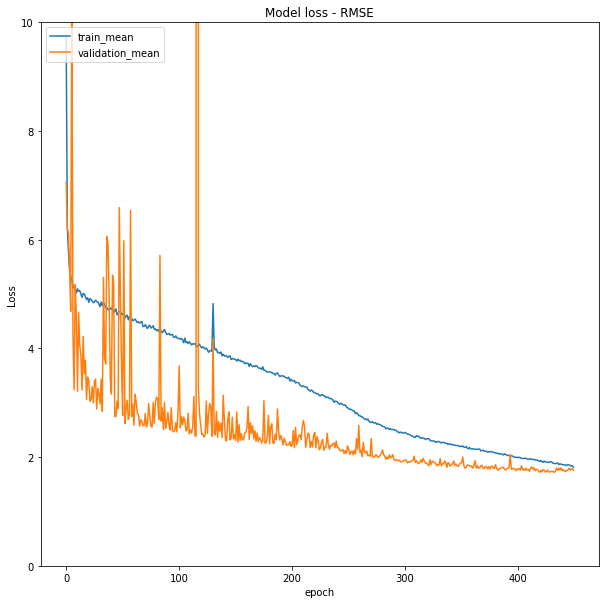

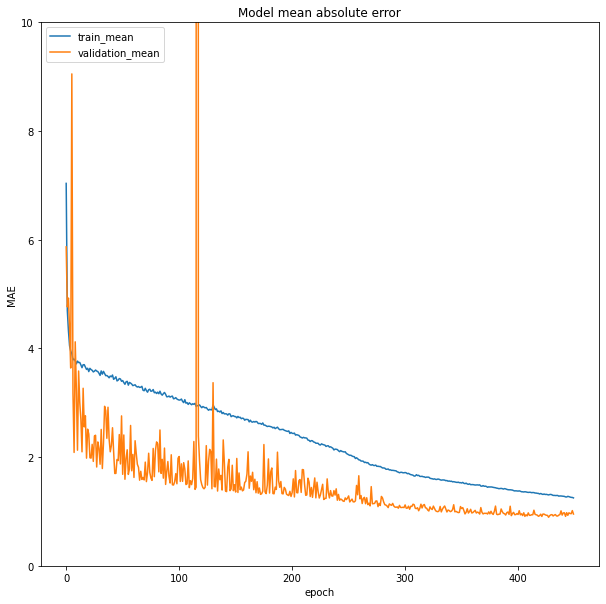

In [63]:
# summarize history for accuracy
plt.figure(figsize=(10,10))
plt.plot(np.sqrt(results.history['loss']),label='train_mean')
plt.plot(np.sqrt(results.history['val_loss']),label='validation_mean')

plt.title('Model loss - RMSE')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.ylim(0,10)
plt.legend(loc='upper left')
plt.show()


plt.figure(figsize=(10,10))
plt.plot(results.history['mae'],label='train_mean')
plt.plot(results.history['val_mae'],label='validation_mean')
plt.title('Model mean absolute error')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.ylim(0,10)
plt.legend( loc='upper left')
plt.show()

In [64]:
np.sqrt(min(results.history['val_loss']))

1.7183441376492885

In [65]:
#We choose mean filling even though there is no difference
predictions = model.predict(X_test)

In [66]:
predictions = pd.DataFrame(data = predictions,columns = Labels_mean.columns)

In [67]:
y_test_reset = y_test.reset_index()
y_test_reset

index,index,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,4941,73.611238,34.508668,30.841224,36.438155,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,53.030174,63.772367,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,53.030174,75.670795
1,748,65.024000,37.545834,30.492098,38.243434,58.744976,38.941034,72.348878,37.545834,36.421463,38.592234,23.516098,38.592234,58.047220,30.220878,78.627122,30.220878,38.862829,30.569678,16.539629,31.964956,48.629854,59.171902,60.838244,75.566049,33.631220,76.263024,48.280976,71.380293,48.978732,81.844293
2,3045,67.447445,39.869838,33.319641,39.057267,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,49.977208,66.684480,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,49.164735,80.904353
3,1822,66.169447,37.994385,31.191121,39.110976,57.759868,40.128159,72.039584,37.467217,38.149232,39.633625,23.669694,40.404294,58.697747,30.931131,76.995541,27.171311,41.057921,31.025127,17.402383,31.275782,51.042598,58.459324,64.315206,74.180017,32.221210,74.514097,49.882930,74.447281,48.902961,78.344886
4,435,65.085750,38.618250,31.232250,37.947600,59.722500,38.618250,70.448250,39.288000,37.265250,38.618250,25.199250,37.612425,56.706000,31.244025,77.822250,31.244025,41.287500,29.568150,18.544950,30.057375,46.986000,61.074750,60.393000,76.493250,35.254500,73.812000,47.321250,71.130750,46.315500,80.850750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,2419,63.606857,36.516645,28.686994,37.661568,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,48.723017,60.559845,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.723017,72.008969
8455,6901,67.333535,35.754603,28.913643,35.754603,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,51.796065,64.004497,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.688605,86.321989
8456,6090,65.193969,33.984646,30.818031,34.237403,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,45.478338,62.546935,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.005908,74.174049
8457,6825,64.345088,38.205530,33.303642,40.217485,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,49.399168,65.223168,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,50.836352,78.444544


In [68]:
def pred_viz(i):
    img = X_test[i,:,:,0]
    plt.imshow(img,cmap='gray')
    
    columns = Labels_mean.columns
    for a in range(0,Labels_mean.shape[1],2):
        plt.plot(Labels_mean[columns[a]][i],Labels_mean[columns[a+1]][i], 'X',color='w',markersize=10)
        plt.plot(predictions[columns[a]][i],Labels_mean[columns[a+1]][i], 'X',color='r',markersize=10)

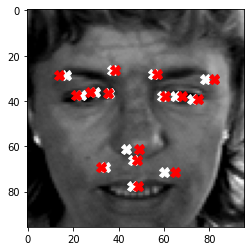

In [73]:
pred_viz(np.random.randint(0,2114))

In [74]:
df_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle/test.csv')

In [75]:
df_test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [76]:
Images_test = df_test['Image']

In [77]:
Images_test = Images_test.apply(lambda x:np.array(x.split(' ')))

In [78]:
Images_test

0       [182, 183, 182, 182, 180, 180, 176, 169, 156, ...
1       [76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, 3...
2       [177, 176, 174, 170, 169, 169, 168, 166, 166, ...
3       [176, 174, 174, 175, 174, 174, 176, 176, 175, ...
4       [50, 47, 44, 101, 144, 149, 120, 58, 48, 42, 3...
                              ...                        
1778    [101, 101, 101, 100, 100, 97, 97, 98, 102, 149...
1779    [201, 191, 171, 158, 145, 140, 136, 130, 123, ...
1780    [28, 28, 29, 30, 31, 32, 33, 34, 39, 44, 46, 4...
1781    [104, 95, 71, 57, 46, 52, 65, 70, 70, 67, 76, ...
1782    [63, 61, 64, 66, 66, 64, 65, 70, 69, 70, 77, 8...
Name: Image, Length: 1783, dtype: object

In [79]:
Images_test =Images_test.apply(lambda x:x.astype(np.uint8))

In [80]:
type(Images_test[0][0])

numpy.uint8

In [81]:
neural_images_test = []
for i in range(Images_test.shape[0]):
    neural_images_test.append(Images_test[i])

In [82]:
neural_images_test = np.reshape(neural_images_test,newshape=(Images_test.shape[0],96,96,1))

In [83]:
neural_images_test.shape

(1783, 96, 96, 1)

In [84]:
neural_images_test = neural_images_test/255

In [85]:
Predictions_test = model.predict(neural_images_test)

In [86]:
predictions_test = pd.DataFrame(data = Predictions_test,columns = Labels_mean.columns)

In [87]:
predictions_test.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.558517,37.255196,29.875824,35.211758,60.158611,37.553593,73.847061,38.386803,36.228981,36.452610,22.294905,36.199688,57.648018,27.919559,80.623734,30.336199,39.651619,26.909880,15.759230,27.556898,47.607109,51.067020,61.016495,76.621201,31.617290,75.070618,46.592396,70.108818,46.416008,82.417274
1,66.789330,36.810909,28.035309,37.985489,59.625420,37.522415,73.928436,37.182087,35.929352,38.344299,21.465803,38.825275,55.552124,29.257660,80.745392,29.478609,38.429798,29.928282,14.184013,31.964451,48.207180,60.218697,65.811935,75.355042,32.690689,76.857132,48.801266,72.824257,49.050613,85.431213
2,65.512779,36.628265,32.172932,37.563652,59.932323,37.650890,71.857086,37.267353,37.570095,37.960979,25.933249,38.202724,56.862122,29.486769,77.771927,29.569096,40.124519,29.920891,19.587008,30.862549,49.086937,57.782242,62.622643,74.913208,36.587563,75.436584,49.326275,70.920929,49.892120,83.264626
3,65.650139,39.841179,30.160387,40.806671,59.086998,39.209038,73.345703,38.975426,37.100140,40.056755,22.647612,40.702747,54.975155,30.919628,79.686081,31.508656,39.577816,31.673086,15.663693,33.979088,47.343445,56.650185,65.574318,76.171555,33.142426,77.690605,48.907692,73.431709,48.197250,81.776413
4,67.232895,37.624928,28.423809,38.309059,60.457840,37.746540,74.232803,38.007011,35.579460,38.084785,21.847780,38.862198,56.824402,28.065845,81.065445,29.650213,38.169014,28.394485,14.595020,31.079725,47.994881,54.769493,64.803131,75.897873,32.860474,76.659210,48.430893,70.265915,48.669006,85.782104


In [88]:
predictions_test2 = predictions_test.clip(0,96)

In [89]:
predictions_test.shape

(1783, 30)

In [90]:
predictions_test.columns.shape

(30,)

In [91]:
sample = pd.read_csv('/content/gdrive/MyDrive/Kaggle/IdLookupTable.csv')

In [92]:
for i in range(sample.shape[0]):
    current_feature = sample['FeatureName'].loc[i]
    current_image = sample['ImageId'].loc[i]-1
    sample.at[i,'Location'] = predictions_test2[current_feature].loc[current_image]
    # print(i)

In [93]:
sample.head()

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,66.558517
1,2,1,left_eye_center_y,37.255196
2,3,1,right_eye_center_x,29.875824
3,4,1,right_eye_center_y,35.211758
4,5,1,left_eye_inner_corner_x,60.158611


In [94]:
sample2 = sample.drop(columns=['ImageId','FeatureName'])

In [95]:
sample2.head()

,RowId,Location
0,1,66.558517
1,2,37.255196
2,3,29.875824
3,4,35.211758
4,5,60.158611


In [96]:
sample.to_csv('/content/gdrive/MyDrive/Kaggle/Submission_full_interfered_n_b_FINAL.csv',index=False)
sample2.to_csv('/content/gdrive/MyDrive/Kaggle/Submission_short_interfered_n_b_FINAL.csv',index=False)

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
# Let's plot our neural network to see how data is passed through
plot_model(model, show_shapes=True, show_layer_names=False)